#                                           Name :- Owais Khan

##                                                     McDonalds Code

In [8]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [12]:
df = pd.read_csv('mcdonalds.csv') # read the data
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


#### Summary of data

In [13]:
df.shape

(1453, 15)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [22]:
segmentation_vars = df.iloc[:, :11]
bsv = segmentation_vars.applymap(lambda x: 1 if x == 'Yes' else 0)
bsv

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


#### Principal Component Analysis

In [30]:
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

In [31]:
explained_variance = np.round(pca.explained_variance_ratio_, 2)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_), 2)

print("Explained variance by each component : ",explained_variance)
print()
print("Cumulative explained variance : ",cumulative_variance)


Explained variance by each component :  [0.3  0.19 0.13 0.08 0.06 0.05 0.04 0.04 0.04 0.03 0.03]

Cumulative explained variance :  [0.3  0.49 0.63 0.71 0.77 0.82 0.86 0.9  0.94 0.97 1.  ]


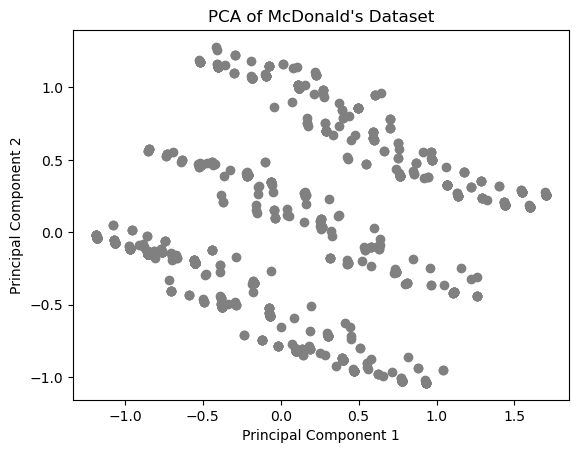

In [36]:
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c="grey")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of McDonald\'s Dataset')
plt.show()


In [40]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(binary_segmentation_vars)

# Add cluster labels to the dataframe
df['segment'] = kmeans.labels_

# Display the first few rows with segment labels
print(df.head())


C:\Users\owais\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\owais\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  segment  VisitFrequencyNum  
0         No   -3   61  Every three months  Female        2                3.0  
1         No   +2   51  Every three months  Female        1                3.0  
2         No   +1   62  Every three months  Female        1                3.0  
3        Yes   +4   69         Once a week  Female        3                NaN  
4         No   +2   49        Once a month    Male        2                NaN  


C:\Users\owais\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\owais\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\owais\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\owais\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

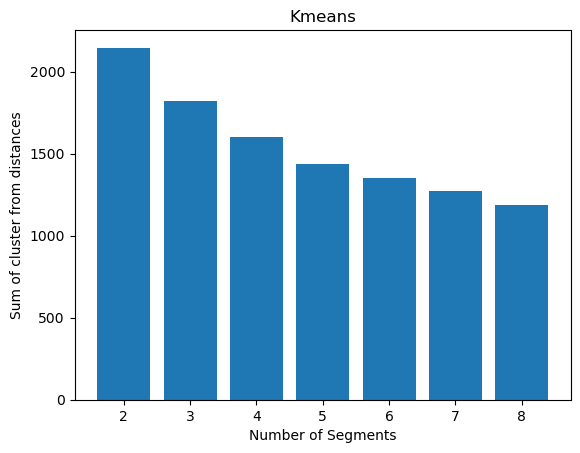

In [45]:
k_values = range(2, 9)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(MD_x)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.bar(k_values, inertia_values)
plt.title('Kmeans')
plt.xlabel('Number of Segments')
plt.ylabel('Sum of cluster from distances')
plt.show()